# Lending Club Case Study:
We are using this Lending club case study here to use EDA (Exploratory Data Analysis) to identify driven variable in loan and customer data.

In [5]:
#import required libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [6]:
#Read loan csv file
loan = pd.read_csv('loan.csv')

C:\Users\Hims\Swati\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#To see top 5 rows as result of loan data using head
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#Checking the data info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
#checking the data shape as how many rows and columns are there
loan.shape

(39717, 111)

In [10]:
# chekcing data type
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [11]:
a = loan.isnull().sum()

In [12]:
#Dropping features having above 10K Null values:
loan.drop(columns=list(a[a.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

In [13]:
#We can check if there is unique or single values
column_unique = loan.nunique()
column_unique

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [14]:
# We are looking into features with single values and dropping them as there is no any use of them
a1 = column_unique[column_unique.values == 1]
a1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [15]:
#dropping feature with 1 value
loan.drop(columns = list(a1.index), inplace=True)
loan.shape

(39717, 44)

In [18]:
# Now removing all features which are not require or not usbale to study the data
loan =loan.drop(["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"],axis=1)


In [19]:
loan.shape

(39717, 28)

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_title               37258 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
title                   39706 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs    

In [21]:
# just checking loan status
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [22]:
# As current 'Status' will be not require and not give any information during data analysis. Hence, dropping those data
loan = loan[~(loan['loan_status'] == 'Current')]

In [23]:
# checking data shape now
loan.shape

(38577, 28)

In [24]:
#Checking for missing values, and dispalying only those columns with missing values
loan.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)

emp_title               2386
emp_length              1033
pub_rec_bankruptcies     697
revol_util                50
title                     11
dtype: int64

In [25]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [27]:
loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [28]:
# Removing % from int_rate
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
30        7.51
         ...  
39687    12.49
39688    13.43
39689    11.54
39690    10.59
39691    15.96
39692     9.01
39693     9.96
39694     7.43
39695     7.43
39696    10.59
39697    10.28
39698     9.01
39699     8.38
39700     7.75
39701     8.38
39702    11.22
39703    10.28
39704     8.70
39705     7.43
39706     8.07
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [29]:
loan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [30]:
loan['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [34]:
print(loan['emp_title'].value_counts().head())


US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64


In [35]:
print(loan['emp_title'].unique().shape)

(28028,)


In [36]:
loan['emp_length'].isnull().sum()

1033

In [37]:
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [38]:
loan['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [52]:
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [53]:
loan['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [55]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month'],
      dtype='object')

In [56]:
# Dropped issue_d feature and converted it to issue_year and issue_month
loan['issue_year'].value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [57]:
loan['issue_month'].value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_month, dtype: int64

In [58]:
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [59]:
len(loan['title'].value_counts())

19297

In [60]:
# Removing title feature as it has many unique value
loan.drop(columns=['title'], inplace=True)

In [61]:
loan['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
Nov-99    315
Nov-00    312
Sep-00    299
Oct-98    295
Nov-97    293
Dec-95    287
Dec-99    284
Dec-00    277
Jan-00    276
Sep-01    265
Jul-00    264
Nov-96    263
Aug-00    262
Oct-01    261
Dec-96    259
Oct-02    259
Sep-99    255
Aug-98    250
May-00    250
Apr-00    245
Oct-97    243
Aug-99    242
Oct-03    240
Jan-99    239
Sep-98    237
         ... 
Dec-63      1
May-67      1
May-65      1
Feb-67      1
Dec-65      1
Jun-66      1
Sep-65      1
Mar-63      1
Nov-62      1
Oct-68      1
Nov-08      1
Dec-61      1
Jun-68      1
Oct-54      1
Sep-56      1
Nov-61      1
Oct-08      1
Oct-69      1
Sep-63      1
Oct-74      1
Mar-68      1
Jun-59      1
Nov-54      1
Jun-67      1
Dec-66      1
Feb-66      1
Nov-65      1
Jan-46      1
Jun-72      1
Aug-67      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [63]:
# dropping earliest_cr_line also
loan.drop(columns=['earliest_cr_line'], inplace=True)

In [64]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
loan_amnt               38577 non-null int64
funded_amnt             38577 non-null int64
funded_amnt_inv         38577 non-null float64
term                    38577 non-null object
int_rate                38577 non-null float64
installment             38577 non-null float64
grade                   38577 non-null object
sub_grade               38577 non-null object
emp_title               36191 non-null object
emp_length              37544 non-null object
home_ownership          38577 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
loan_status             38577 non-null object
purpose                 38577 non-null object
addr_state              38577 non-null object
dti                     38577 non-null float64
delinq_2yrs             38577 non-null int64
inq_last_6mths          38577 non-null int64
open_acc        

In [69]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,issue_year,issue_month
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.043479,2010.309070,7.114757
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.204583,0.882658,3.408523
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2007.000000,1.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.000000,2010.000000,4.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.000000,2011.000000,7.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.000000,2011.000000,10.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,2011.000000,12.000000


# We have cleaned data set, now we have data set for EDA analysis

Univariate Analysis

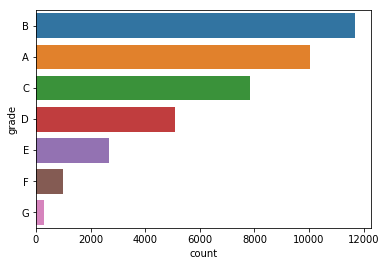

In [77]:
#Analysing the Categorical columns:
sns.countplot(y="grade", data=loan ,order = loan['grade'].value_counts().index)

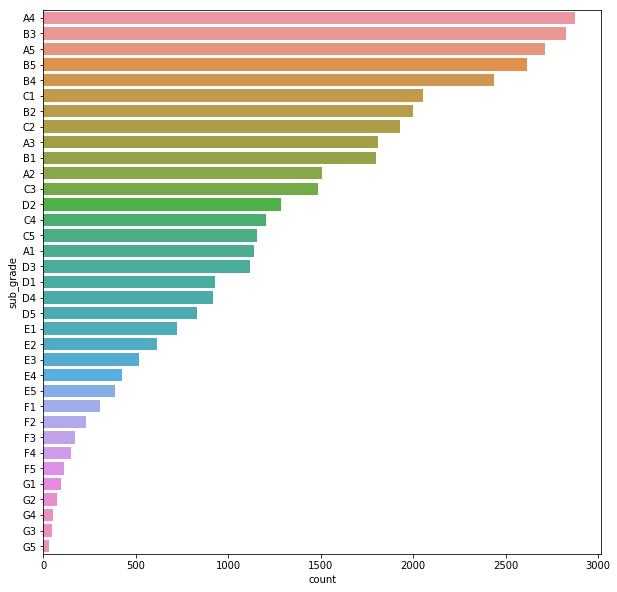

In [72]:
plt.figure(figsize=(10,10))
sns.countplot(y="sub_grade", data=loan,order = loan['sub_grade'].value_counts().index)

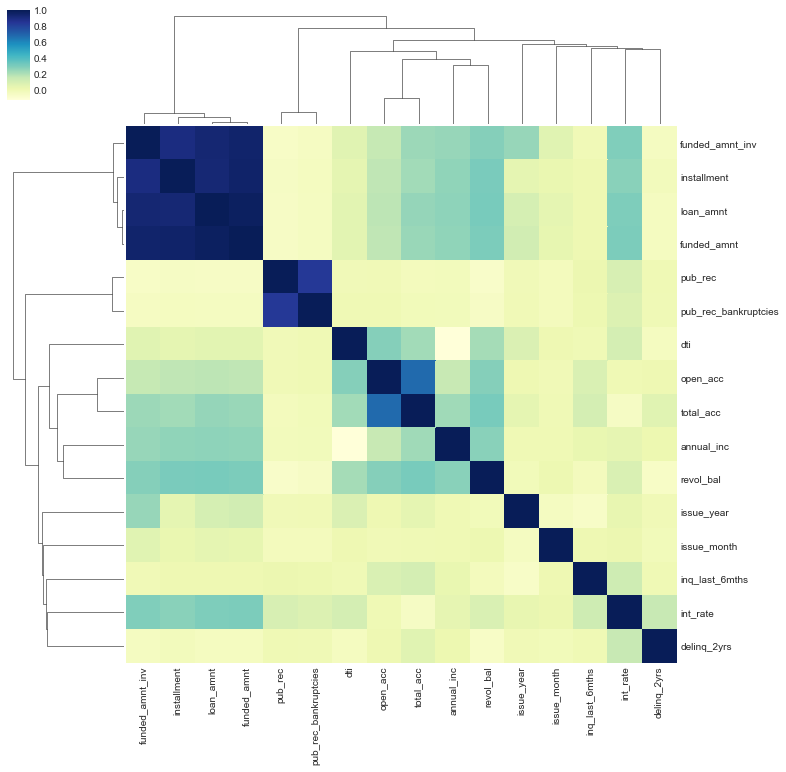

In [79]:
sns.set_style("whitegrid")
sns.clustermap(data=loan.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

In [80]:
# Darker value higher correlation. we can see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation 
#These fields are proportional to each other. Next, the public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

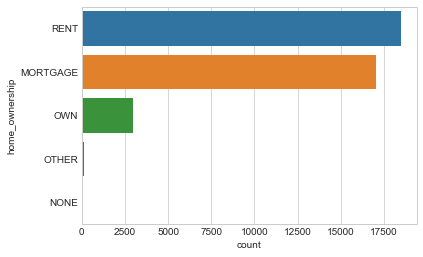

In [81]:
sns.countplot(y="home_ownership", data=loan,order = loan['home_ownership'].value_counts().index)

In [82]:
#Rent and Mortgage are higher here

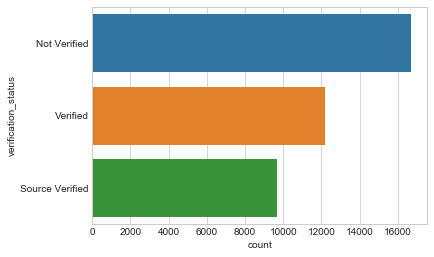

In [87]:
sns.countplot(y="verification_status", data=loan,order = loan['verification_status'].value_counts().index)

Not verified count is higher compare to others

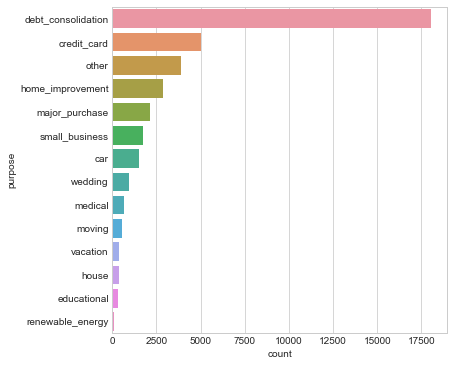

In [89]:
plt.figure(figsize=(6,6))
sns.countplot(y="purpose", data=loan,order = loan['purpose'].value_counts().index)
plt.show()

Debt Consolidation purposes contributed for most of the loan counts

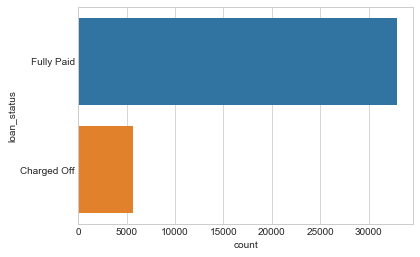

In [92]:
# we can check for of defaulters in the data
sns.countplot(y="loan_status", data=loan)
plt.show()

As we can see Charged off defaulter are less compare to fully paid

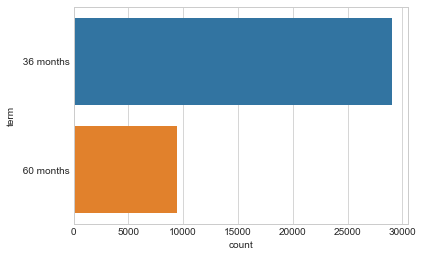

In [94]:
# Let us see count of Loan Application with Term Variable
sns.countplot(y="term", data=loan,order = loan['term'].value_counts().index)
plt.show()

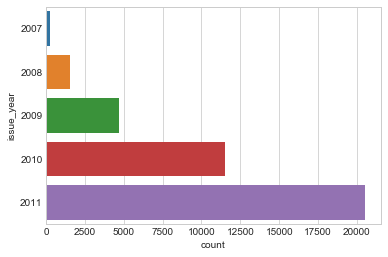

In [95]:
sns.countplot(y="issue_year", data=loan)
plt.show()

Max loan approved in 2011

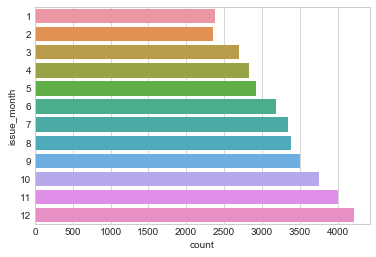

In [96]:
sns.countplot(y="issue_month", data=loan)
plt.show()

Max loan appproved in Dec month 

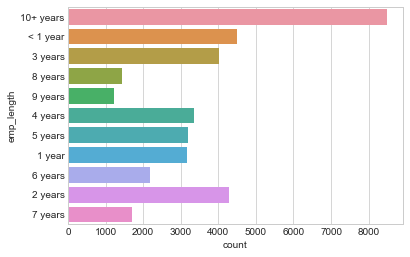

In [97]:
sns.countplot(y="emp_length", data=loan)
plt.show()

Mostly loan appproved for who have 10+ year experience

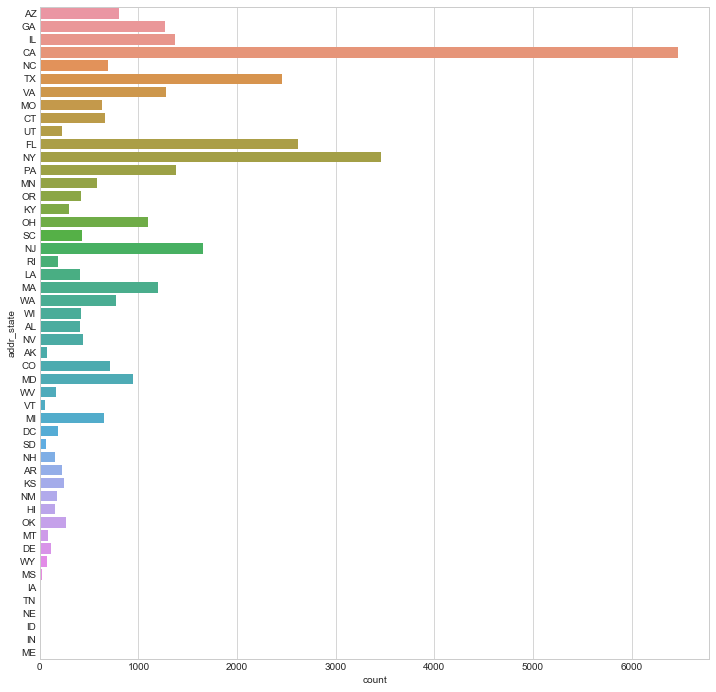

In [103]:
plt.figure(figsize=(12,12))
sns.countplot(y="addr_state", data=loan)

Bivariate Analysis

In [104]:
# Let us do Bivariate analysis

In [122]:
# Function to plot bar plots of categoric variables with respect to loan status
def plotBar(feature, data=loan, rsorted=True):
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]== 'Charged Off']) 
        feature_values.append(feature_count)
    plt.bar(feature_dimension, feature_values)
    plt.title("Defaulters vs "+str(feature)+" feature")
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Defaulter count", fontsize=14)
    plt.show()

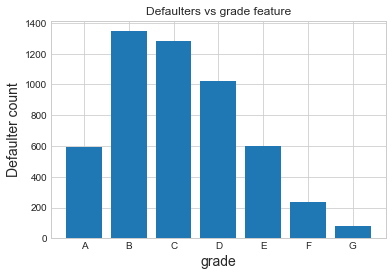

In [123]:
# Defaulter count vs grade:
plotBar("grade")

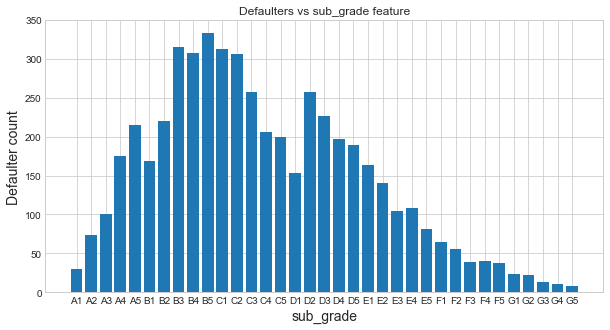

In [128]:
# Defaulters count vs sub_grade:
plt.figure(figsize= (10,5))
plotBar("sub_grade")

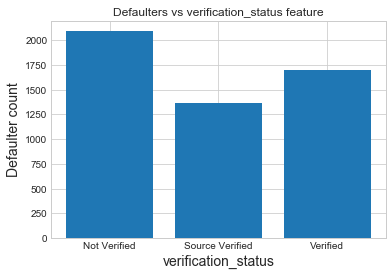

In [129]:
# checking with verification status:
plotBar("verification_status")

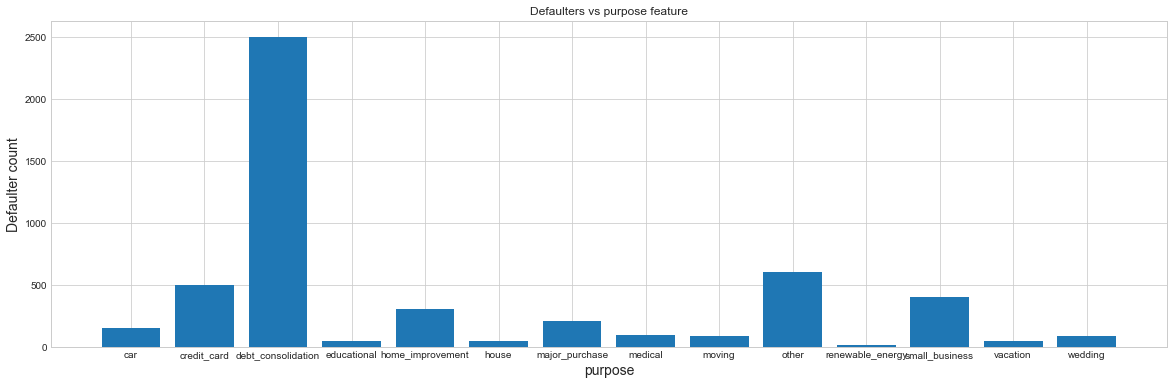

In [131]:
# checking with purpose:
plt.figure(figsize= (20,6))
plotBar("purpose")

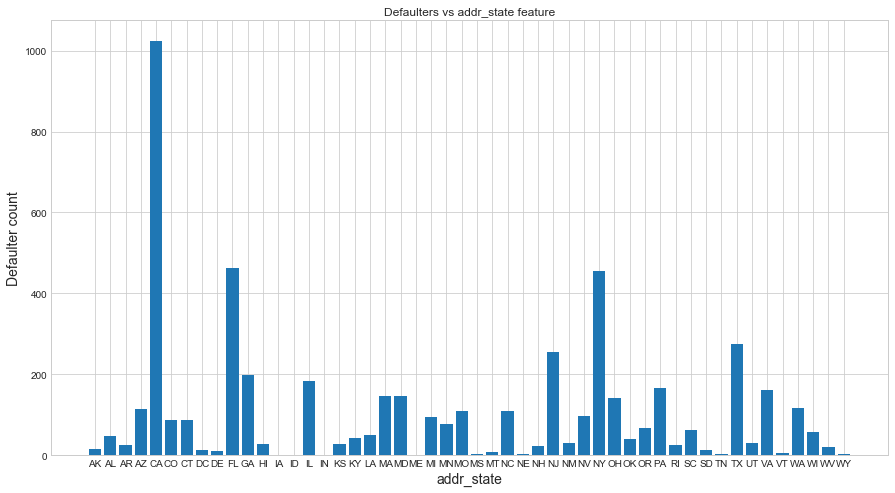

In [133]:
# checking with address status:
plt.figure(figsize= (15,8))
plotBar("addr_state")

In [153]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [156]:
def Bivariate_Categorical (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

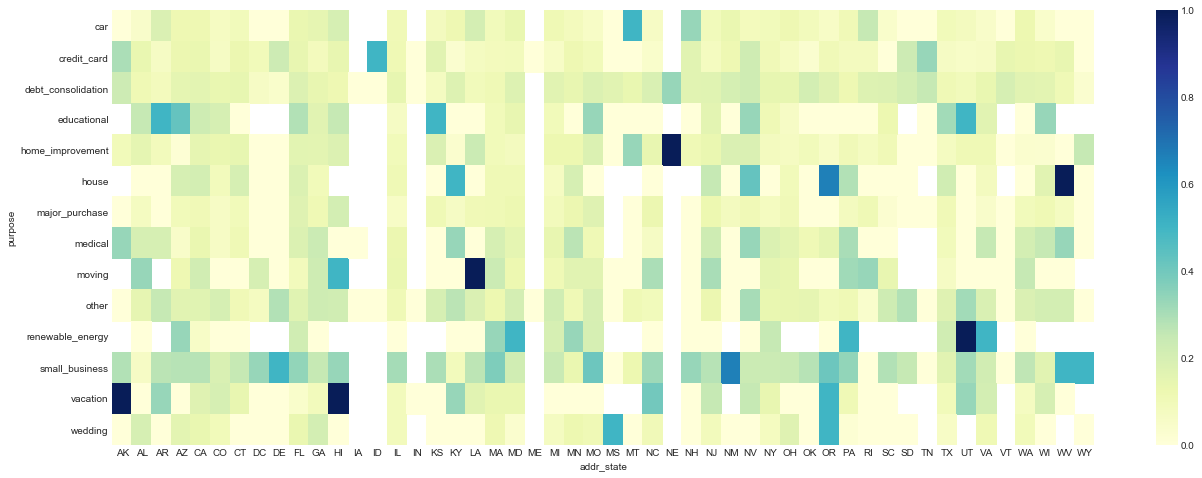

In [157]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

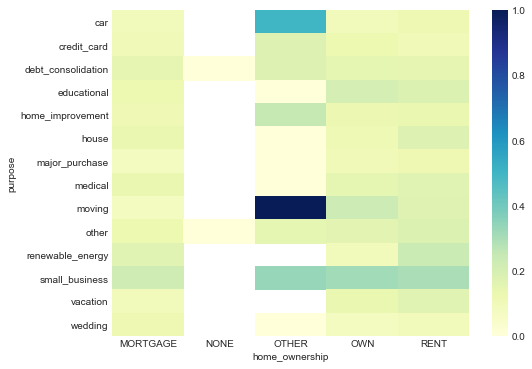

In [161]:
Bivariate_Categorical(x='home_ownership', y='purpose')

We have done with some EDA with data

# Conclusions:
.Higher loan amount (above 16K)
•Lower annual income (below 37K)
•Applicant’s address state (NV, SD, AK, FL, etc.)
•Loan issue month (Dec, May, Sep)
•Higher interest rate (above 13%)
•Repayment term (5 years)
•Loan grade & sub-grade (D to G)
•Missing employment record
•Loan purpose (small business, renewable energy, educational)
•High loan amount & interest rate for lower income group
•High installment and longer repayment term
•Loans of higher grade have higher tendency to be default
